In [1]:
!pip install yellowbrick

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('datasets/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


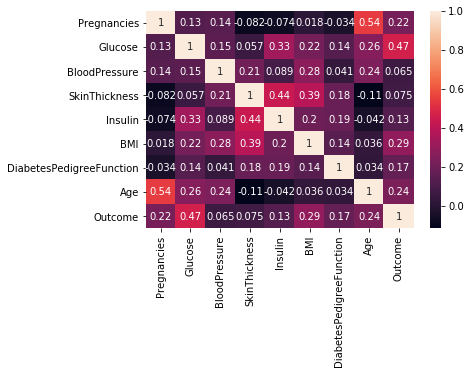

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
X = df[['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction']]
Y = df['Age']

In [9]:
feature_names = X.columns
feature_names

Index(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'], dtype='object')

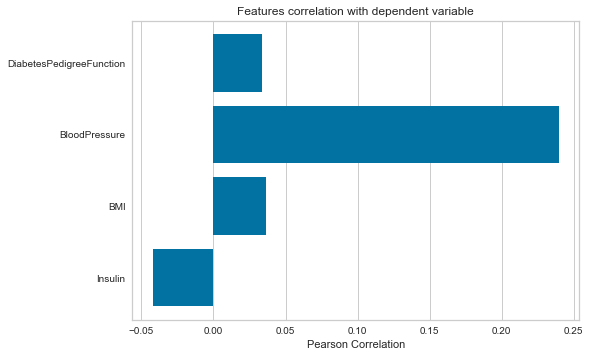

In [10]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(labels=feature_names, method='pearson')
visualizer.fit(X, Y)
visualizer.poof()

In [11]:
visualizer.scores_

array([-0.04216295,  0.03624187,  0.23952795,  0.03356131])

In [12]:
visualizer.features_

array(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'],
      dtype=object)

In [14]:
score_df = pd.DataFrame(dict(Feature_names=visualizer.features_,
                            Scores=visualizer.scores_))
score_df.sort_values('Scores', ascending=False)

,Feature_names,Scores
2,BloodPressure,0.239528
1,BMI,0.036242
3,DiabetesPedigreeFunction,0.033561
0,Insulin,-0.042163


In [15]:
X = df.drop(['Outcome'], axis=1)
Y = df['Outcome']

In [16]:
feature_names = X.columns

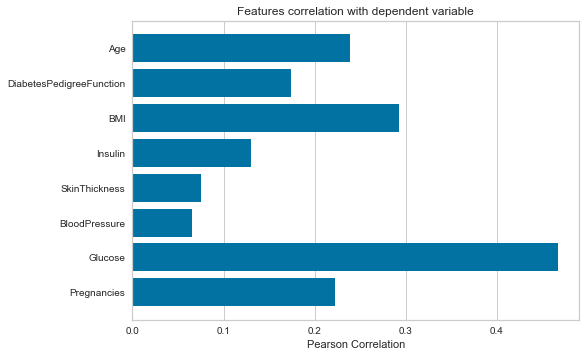

In [17]:
visualizer = FeatureCorrelation(labels=feature_names, method='pearson')
visualizer.fit(X, Y)
visualizer.poof();

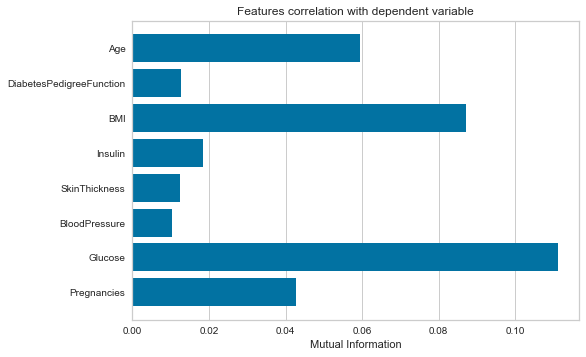

In [18]:
discrete_features = [False for _ in range(len(feature_names))]
discrete_features[0] = True # Pregnancies is a discrete feature

visualizer = FeatureCorrelation(labels=feature_names,
                                method='mutual_info-classification')

visualizer.fit(X, Y, discrete_features=discrete_features, random_state=1)
visualizer.poof();

In [19]:
feature_to_plot = ['Age', 'BMI', 'Insulin', 'BloodPressure', 'Glucose']

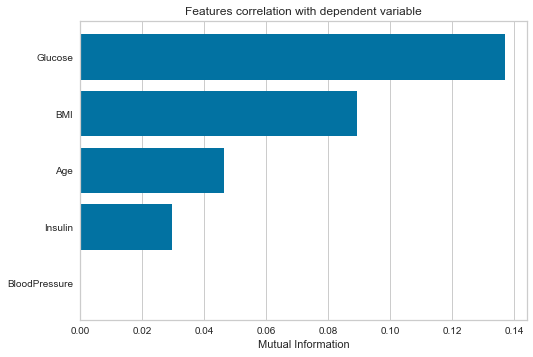

In [20]:
visualizer = FeatureCorrelation(method='mutual_info-classification',
                                feature_names=feature_to_plot,
                                sort=True)
visualizer.fit(X, Y, random_state=1)
visualizer.poof();